# Exploratory Data Analysis

## 1. Импорт библиотек и загрузка данных

Цель анализа:
- Понять структуру данных, выявить паттерны и аномалии.
- Подготовить данные для последующего моделирования

Используемые датасеты:
1. Логи MySQL (log_pk_abitur2.txt)
2. Информация о подаче документов абитуриентами (Подача документов.xlsx)
3. Информация об оригиналах документов абитуриентов (Оригиналы.xlsx)
4. Информация об олимпиадах абитуриентов (Олимпиады.xlsx)
5. Информация о льготах абитуриентов (Льготы.xlsx)
6. Возраст, пол и место проживания абитуриента (Информация по абитуриенту.xlsx)
7. Информация об индивидуальных достижениях абитуриентов (ИД.xlsx)
8. Информация о зачислении абитуриента (Зачисление.xlsx)
9. Информация о результатах экзаменов абитуриентов (ЕГЭ.xlsx)
10. Информация о сдачи вступительных экзаменов абитуриентами (ВИ.xlsx)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
ROOT_DIR = Path.cwd().resolve().parent
DATA_DIR = ROOT_DIR / 'data'

logs = pd.read_csv(DATA_DIR / 'log_pk_abitur2.txt', sep=';')
docs = pd.read_excel(DATA_DIR / 'Подача документов.xlsx')
origs = pd.read_excel(DATA_DIR / 'Оригиналы.xlsx')
enrollment = pd.read_excel(DATA_DIR / 'Зачисление.xlsx')
achievements = pd.read_excel(DATA_DIR / 'ИД.xlsx')
info = pd.read_excel(DATA_DIR / 'Информация по абитуриенту.xlsx')
benefits = pd.read_excel(DATA_DIR / 'Льготы.xlsx')
olympiads = pd.read_excel(DATA_DIR / 'Олимпиады.xlsx')
trials = pd.read_excel(DATA_DIR / 'ВИ.xlsx')
exams = pd.read_excel(DATA_DIR / 'ЕГЭ.xlsx')

## 2. Обзор данных

### 2.1. Логи

In [4]:
logs.head(1)

,log_pk_abitur_id,_oper_type,_oper_ts,_oper_user_kod,_oper_session_id,_oper_mysql_user,abitur_kod,priem_type_kod,filial_kod,y,zayav_type_kod,reg_nom,reg_nomer_text,is_interdekanat,is_parallel,is_orig_doc,orig_doc_epgu_status,is_epgu_orig_doc,epgu_orig_doc_upd_ts,orig_doc_d,orig_doc_user_kod,orig_doc_change_ts,has_obraz_doc_scan,has_agreement,agreement_konkurs_grp_kod,agreement_konkurs_type_kod,want_2_volna,zayav_d,reg_ts,pk_user_kod,is_zabrali_doc,zabrali_doc_ts,upd_ts,_user_kod,_session_id,_mysql_user
0,1,insert,9.7.2015 18:45:53,0,0,pk2014@localhost,467762,1,1,2015,1,8068,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,9.7.2015 0:00:00,9.7.2015 18:45:53,418.0,0,NaN,NaN,NaN,0.0,pk2014@localhost


In [5]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943137 entries, 0 to 943136
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   log_pk_abitur_id            943137 non-null  int64  
 1   _oper_type                  943137 non-null  object 
 2   _oper_ts                    943137 non-null  object 
 3   _oper_user_kod              943137 non-null  int64  
 4   _oper_session_id            943137 non-null  int64  
 5   _oper_mysql_user            943137 non-null  object 
 6   abitur_kod                  943137 non-null  int64  
 7   priem_type_kod              943137 non-null  int64  
 8   filial_kod                  943137 non-null  int64  
 9   y                           943137 non-null  int64  
 10  zayav_type_kod              943137 non-null  int64  
 11  reg_nom                     943137 non-null  int64  
 12  reg_nomer_text              712629 non-null  object 
 13  is_interdekana

| Столбец                      | Описание                                                   |
|------------------------------|------------------------------------------------------------|
| **log_pk_abitur_id**         | Уникальный ID записи логов                                 |
| **_oper_type**               | Тип операции (`insert`, `update`, `delete`)                |
| **_oper_ts**                 | Дата и время операции (от 2015-07-09 до 2024-12-26)        |
| **_oper_user_kod**           | Код пользователя, совершившего операцию                    |
| **_oper_session_id**         | ID сессии пользователя                                     |
| **_oper_mysql_user**         | Пользователь MySQL, записавший операцию в БД               |
| **abitur_kod**               | Уникальный ID абитуриента                                  |
| **priem_type_kod**           | Код способа подачи документов         |
| **filial_kod**               | Код филиала         |
| **y**                        | Год приёмной кампании (от 2014 до 2024)                    |
| **zayav_type_kod**           | Код типа заявки                        |
| **reg_nom**                  | Регистрационный номер заявки |
| **reg_nomer_text**           | Регистрационный номер заявки в текстовом формате            |
| **is_interdekanat**          | Иностранный абитуриент (1 — да, 0 — нет)             |
| **is_parallel**              | Зачисление абитуриента дважды на один zayav_type_kod|
| **is_orig_doc**              | Признак предоставления оригиналов документов (1 — да, 0 — нет) |
| **orig_doc_epgu_status**     | Статус бумажного оригинала, переданный в ЕПГУ           |
| **is_epgu_orig_doc**         | Электронный оригинал из ЕПГУ |
| **epgu_orig_doc_upd_ts**     | Дата обновления статуса оригинала через ЕПГУ (от 2022-07-22 до 2024-08-27) |
| **orig_doc_d**               | Дата предоставления оригинала документов                   |
| **orig_doc_user_kod**        | Код пользователя, изменившего информацию об оригиналах     |
| **orig_doc_change_ts**       | Дата изменения информации об оригиналах документов         |
| **has_obraz_doc_scan**       | Наличие сканов документов                                  |
| **has_agreement**            | Наличие согласия на зачисление         |
| **agreement_konkurs_grp_kod**| Код конкурсной группы       |
| **agreement_konkurs_type_kod**| Код типа конкурсной группы (2 – целевая квота, 3 – основные места, 4  – особая квота, 6 – отдельная квота)          |
| **want_2_volna**             | Желание участвовать во второй волне зачисления |
| **zayav_d**                  | Дата подачи заявки (от 2013-09-11 до 2024-12-20)           |
| **reg_ts**                   | Дата регистрации заявки (от 2014-06-20 до 2024-12-26)      |
| **pk_user_kod**              | Код пользователя приёмной комиссии                         |
| **is_zabrali_doc**           | Признак того, что документы были забраны                   |
| **zabrali_doc_ts**           | Дата, когда документы были забраны (2017-06-06 – 2020-01-13) |
| **upd_ts**                   | Дата последнего обновления заявки                          |
| **_user_kod**                | Код пользователя                                           |
| **_session_id**              | ID сессии                                                  |
| **_mysql_user**              | Пользователь MySQL, совершивший последнюю операцию         |


### 2.2. Подача документов

In [6]:
docs.head(1)

,abitur_kod,priem_doc_type_name,grp_spec_name,prior,ob_osnova_name,ts_abitur,ts_reg,y
0,636499,дистанционно,Торговое дело,5,Бюджет,2023-07-09 14:34:18,2023-07-10 13:51:18,2023


In [7]:
docs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82595 entries, 0 to 82594
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   abitur_kod           82595 non-null  int64         
 1   priem_doc_type_name  82595 non-null  object        
 2   grp_spec_name        82595 non-null  object        
 3   prior                82595 non-null  int64         
 4   ob_osnova_name       82595 non-null  object        
 5   ts_abitur            82595 non-null  datetime64[ns]
 6   ts_reg               82595 non-null  datetime64[ns]
 7   y                    82595 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 5.0+ MB


| Столбец                | Описание                                    |
|------------------------|---------------------------------------------|
| **abitur_kod**         | Уникальный ID абитуриента                   |
| **priem_doc_type_name**| Способ подачи документов                    |
| **grp_spec_name**      | Название специальности                      |
| **prior**              | Приоритет специальности     |
| **ob_osnova_name**     | Форма обучения (бюджет или договор)         |
| **ts_abitur**          | Дата и время подачи заявления               |
| **ts_reg**             | Дата и время регистрации заявления          |
| **y**                  | Год приёмной кампании (2023-2024)                       |

### 2.3. Оригиналы

In [8]:
origs.head(1)

,abitur_kod,transfer_type,short_name,transfer_date
0,652903,2,ФГБОУ ВО Кубанский ГАУ,2024-07-04 14:06:46


In [9]:
origs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5251 entries, 0 to 5250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   abitur_kod     5251 non-null   int64         
 1   transfer_type  5251 non-null   int64         
 2   short_name     5251 non-null   object        
 3   transfer_date  5251 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 164.2+ KB


| Столбец                | Описание                                                |
|------------------------|---------------------------------------------------------|
| **abitur_kod**         | Уникальный ID абитуриента                               |
| **transfer_type**      | Тип перевода                        |
| **short_name**         | Название вуза, где находятся оригиналы документов       |
| **transfer_date**      | Дата перевода документов (от 2024-06-20 до 2024-08-30)        |

### 2.4. Зачисление

In [10]:
enrollment.head(1)

,abitur_kod,konkurs_type_name,ob_osnova_name,y
0,635477,основные места,Договор,2023


In [11]:
enrollment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5853 entries, 0 to 5852
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   abitur_kod         5853 non-null   int64 
 1   konkurs_type_name  5853 non-null   object
 2   ob_osnova_name     5853 non-null   object
 3   y                  5853 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 183.0+ KB


| Столбец                | Описание                                    |
|------------------------|---------------------------------------------|
| **abitur_kod**         | Уникальный ID абитуриента                   |
| **konkurs_type_name**  | Тип конкурса (основное место или квота)     |
| **ob_osnova_name**     | Форма обучения (бюджет или договор)         |
| **y**                  | Год приёмной кампании (2023-2024)                      |

### 2.5. ИД

In [12]:
achievements.head(1)

,abitur_kod,personal_result_kod,ball,y
0,626530,383,7,2023


In [13]:
achievements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   abitur_kod           9425 non-null   int64
 1   personal_result_kod  9425 non-null   int64
 2   ball                 9425 non-null   int64
 3   y                    9425 non-null   int64
dtypes: int64(4)
memory usage: 294.7 KB


| Столбец                | Описание                                    |
|------------------------|---------------------------------------------|
| **abitur_kod**         | Уникальный ID абитуриента                   |
| **personal_result_kod**| Код индивидуального достижения              |
| **ball**               | Баллы за достижения (от 2 до 10)            |
| **y**                  | Год приёмной кампании (2023-2024)                      |

### 2.6. Информация по абитуриенту

In [14]:
info.head(1)

,abitur_kod,data_rogdenia,pol_kod,pasp_gorod,pasp_street,fact_gorod,fact_street,y
0,636614,2005-02-05,2,Санкт-Петербург г,Большой Сампсониевский пр-кт,Санкт-Петербург,NaN,2023


In [15]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20007 entries, 0 to 20006
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   abitur_kod     20007 non-null  int64         
 1   data_rogdenia  20007 non-null  datetime64[ns]
 2   pol_kod        20007 non-null  int64         
 3   pasp_gorod     19980 non-null  object        
 4   pasp_street    19897 non-null  object        
 5   fact_gorod     19537 non-null  object        
 6   fact_street    1823 non-null   object        
 7   y              20007 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 1.2+ MB


| Столбец                | Описание                                    |
|------------------------|---------------------------------------------|
| **abitur_kod**         | Уникальный ID абитуриента                   |
| **data_rogdenia**      | Дата рождения абитуриента                   |
| **pol_kod**            | Код пола (1 — муж., 2 — жен.)|
| **pasp_gorod**         | Город по паспорту                           |
| **pasp_street**        | Улица по паспорту                           |
| **fact_gorod**         | Фактический город проживания                |
| **fact_street**        | Фактическая улица проживания                |
| **y**                  | Год приёмной кампании (2023-2024)                       |

### 2.7. Льготы

In [16]:
benefits.head(1)

,abitur_kod,lgota_kod,is_kvota,is_spec_kvota,is_z_kvota,is_preimush,lgota_status_name,y
0,636789,1025,0,1,1,1,Подтверждена,2023


In [17]:
benefits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   abitur_kod         1090 non-null   int64 
 1   lgota_kod          1090 non-null   int64 
 2   is_kvota           1090 non-null   int64 
 3   is_spec_kvota      1090 non-null   int64 
 4   is_z_kvota         1090 non-null   int64 
 5   is_preimush        1090 non-null   int64 
 6   lgota_status_name  1090 non-null   object
 7   y                  1090 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 68.2+ KB


| Столбец                | Описание                                                  |
|------------------------|-----------------------------------------------------------|
| **abitur_kod**         | Уникальный ID абитуриента                                 |
| **lgota_kod**          | Код льготы (подробнее [здесь](https://unecon.ru/wp-content/uploads/2025/01/pr-8.pdf)) |
| **is_kvota**           | Наличие квоты                                             |
| **is_spec_kvota**      | Наличие специальной квоты                                 |
| **is_z_kvota**         | Наличие квоты для детей участников СВО                    |
| **is_preimush**        | Преимущество                          |
| **lgota_status_name**  | Статус льготы (Подтверждена/отказано)                     |
| **y**                  | Год приёмной кампании                                     |

### 2.8. Олимпиады

In [18]:
olympiads.head(1)

,abitur_kod,olimp_kod,olimp_diplom_name,y
0,639768,10990,Победитель (Диплом 1 степени),2023


In [19]:
olympiads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   abitur_kod         432 non-null    int64 
 1   olimp_kod          432 non-null    int64 
 2   olimp_diplom_name  432 non-null    object
 3   y                  432 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 13.6+ KB


| Столбец                | Описание                                    |
|------------------------|---------------------------------------------|
| **abitur_kod**         | Уникальный ID абитуриента                   |
| **olimp_kod**          | Код олимпиады (подробнее [здесь](https://unecon.ru/wp-content/uploads/2025/01/pr-7.pdf)) |
| **olimp_diplom_name**  | Уровень диплома (победитель / призер)  |
| **y**                  | Год приёмной кампании (2023-2024)                       |


### 2.9. ВИ

In [20]:
trials.head(1)

,abitur_kod,d,ball,y
0,626306,2023-07-06,72.0,2023


In [21]:
trials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   abitur_kod  2665 non-null   int64         
 1   d           2665 non-null   datetime64[ns]
 2   ball        2659 non-null   float64       
 3   y           2665 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 83.4 KB


| Столбец                | Описание                                    |
|------------------------|---------------------------------------------|
| **abitur_kod**         | Уникальный ID абитуриента                   |
| **d**                  | Дата получения результатов                  |
| **ball**               | Набранные баллы                             |
| **y**                  | Год приёмной кампании (2023-2024)                      |

### 2.10. ЕГЭ

In [22]:
exams.head(1)

,abitur_kod,ResultDate,ball,y
0,659058,2024-05-28,75,2024


In [23]:
exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28099 entries, 0 to 28098
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   abitur_kod  28099 non-null  int64         
 1   ResultDate  27909 non-null  datetime64[ns]
 2   ball        28099 non-null  int64         
 3   y           28099 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 878.2 KB


| Столбец                | Описание                                    |
|------------------------|---------------------------------------------|
| **abitur_kod**         | Уникальный ID абитуриента                   |
| **ResultDate**         | Дата получения результатов ЕГЭ              |
| **ball**               | Набранные баллы                             |
| **y**                  | Год приёмной кампании (2023-2024)                       |


## 3. Первичная обработка данных

In [24]:
# Приведение типов к datetime в logs
date_cols = [
    '_oper_ts',
    'epgu_orig_doc_upd_ts',
    'orig_doc_d',
    'orig_doc_change_ts',
    'zayav_d',
    'reg_ts',
    'zabrali_doc_ts',
    'upd_ts'
]
for col in date_cols:
    logs[col] = pd.to_datetime(logs[col], dayfirst=True, errors='coerce')
    
# Приведение типов операций к единому формату
logs['_oper_type'] = logs['_oper_type'].str.lower()

## 4. Анализ отдельных признаков

### 4.1. Интервалы между временными столбцами

In [25]:
logs['delta_zayav_reg'] = (logs['reg_ts'] - logs['zayav_d']).dt.total_seconds() / 3600 # в часах
logs['delta_reg_oper'] = (logs['_oper_ts'] - logs['reg_ts']).dt.total_seconds() / 3600
logs['delta_upd_oper'] = (logs['_oper_ts'] - logs['upd_ts']).dt.total_seconds() / 3600

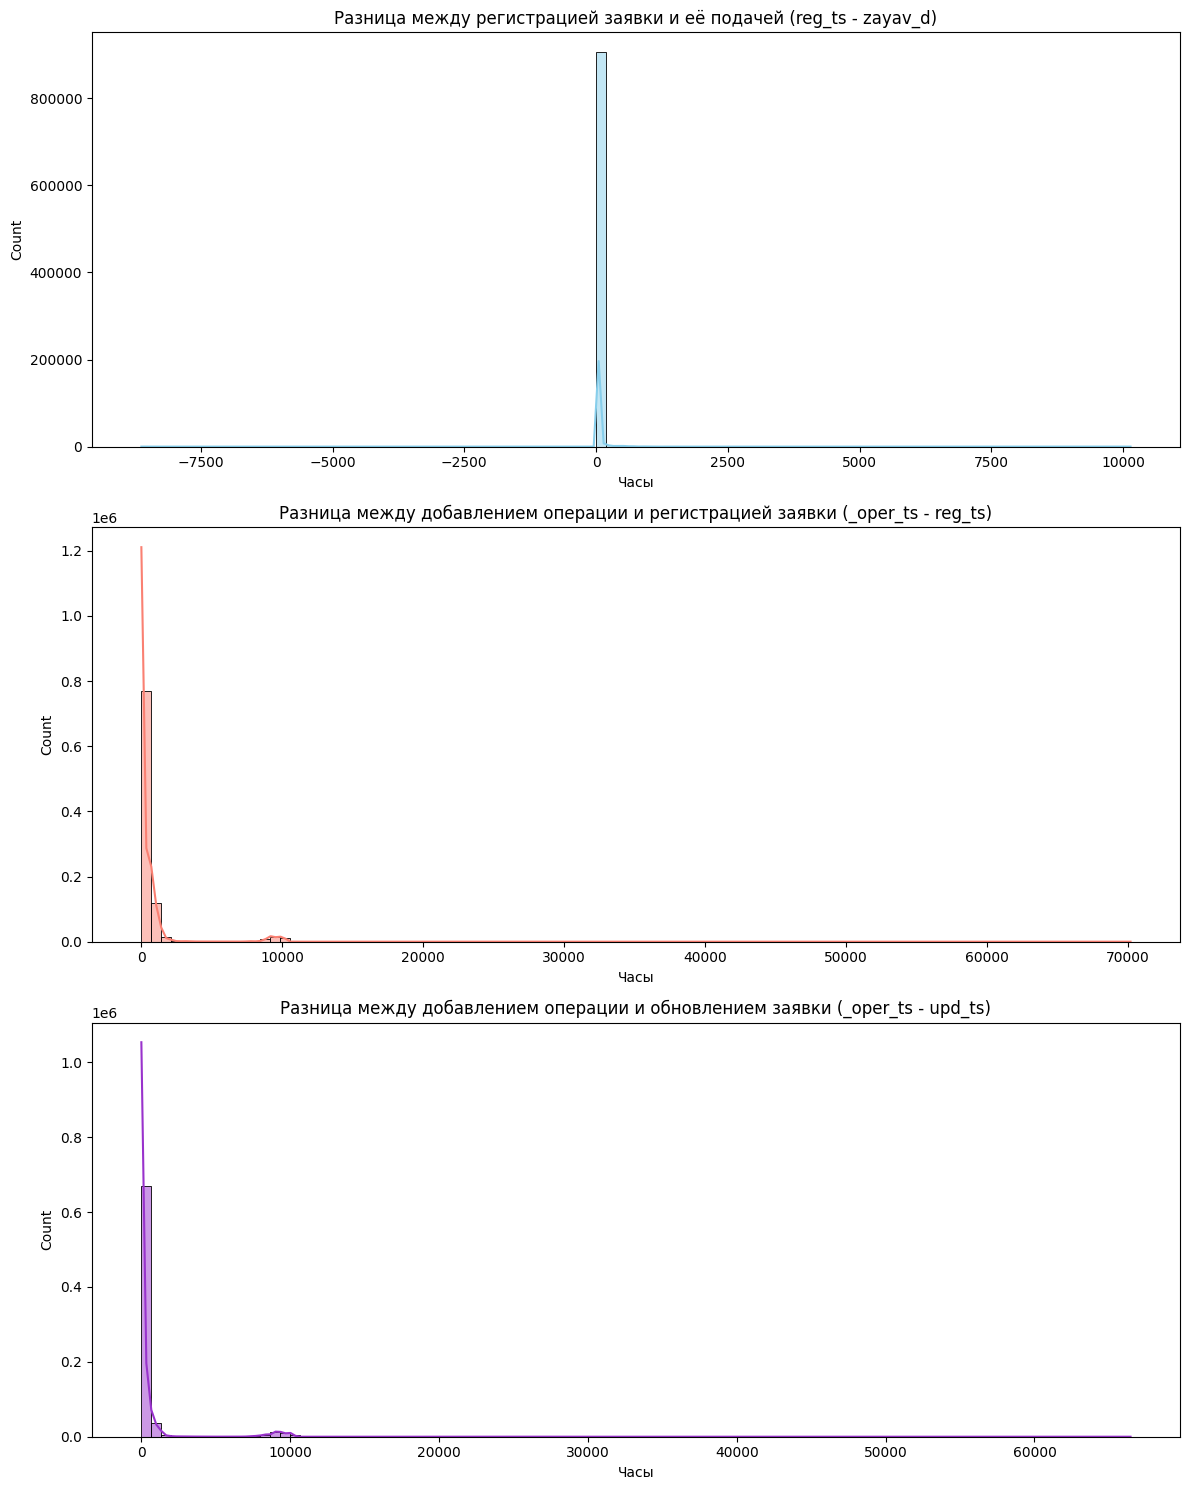

In [26]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

sns.histplot(logs['delta_zayav_reg'], bins=100, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Разница между регистрацией заявки и её подачей (reg_ts - zayav_d)')
axes[0].set_xlabel('Часы')

sns.histplot(logs['delta_reg_oper'], bins=100, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Разница между добавлением операции и регистрацией заявки (_oper_ts - reg_ts)')
axes[1].set_xlabel('Часы')

sns.histplot(logs['delta_upd_oper'], bins=100, kde=True, ax=axes[2], color='darkorchid')
axes[2].set_title('Разница между добавлением операции и обновлением заявки (_oper_ts - upd_ts)')
axes[2].set_xlabel('Часы')

plt.tight_layout()
plt.show()

Cуществуют 145 записей, в которых регистрация заявки указан раньше ее подачи, а также большое количество записей, в которых заявка обрабатывалась спустя большое количество времени (более месяца). Такие записи мы исключим из рассмотрения

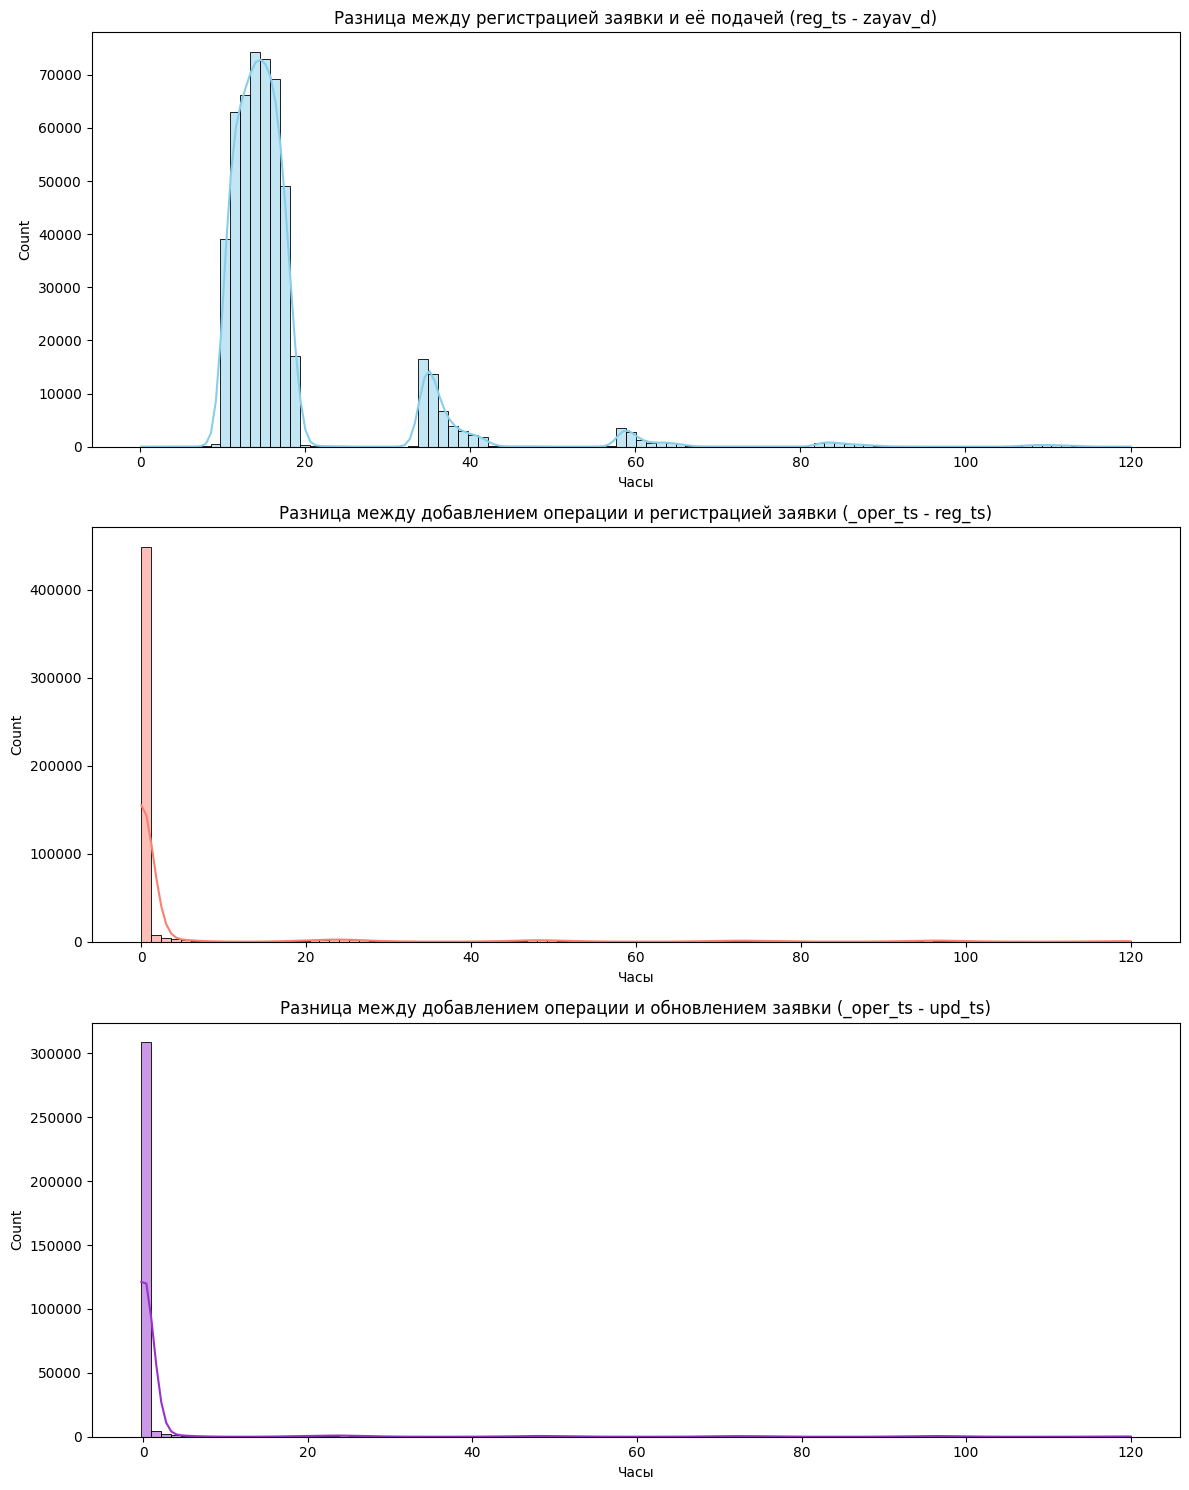

In [27]:
# Длительность рассмотрения заявки до 5 дней
filtered_logs = logs[(logs['delta_zayav_reg'].between(0, 120)) & logs['delta_reg_oper'].between(0, 120)]

fig, axes = plt.subplots(3, 1, figsize=(12, 15))

sns.histplot(filtered_logs['delta_zayav_reg'], bins=100, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Разница между регистрацией заявки и её подачей (reg_ts - zayav_d)')
axes[0].set_xlabel('Часы')

sns.histplot(filtered_logs['delta_reg_oper'], bins=100, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Разница между добавлением операции и регистрацией заявки (_oper_ts - reg_ts)')
axes[1].set_xlabel('Часы')

sns.histplot(filtered_logs['delta_upd_oper'], bins=100, kde=True, ax=axes[2], color='darkorchid')
axes[2].set_title('Разница между добавлением операции и обновлением заявки (_oper_ts - upd_ts)')
axes[2].set_xlabel('Часы')

plt.tight_layout()
plt.show()

### 4.2. Анализ абитуриентов с двойным зачислением

In [28]:
duplicates = enrollment[enrollment.duplicated(['abitur_kod', 'y'], keep=False)].sort_values(['abitur_kod', 'y'])
duplicates.head(6)

,abitur_kod,konkurs_type_name,ob_osnova_name,y
1942,626041,основные места,Договор,2023
1953,626041,основные места,Бюджет,2023
2103,627643,основные места,Бюджет,2023
2137,627643,основные места,Договор,2023
2056,628172,основные места,Бюджет,2023
2069,628172,основные места,Договор,2023


In [29]:
duplicates['abitur_kod'].value_counts().head(1)

abitur_kod
626041    2
Name: count, dtype: int64

В таблице с зачислениями могут быть две записи по абитуриенты, обозначающие о переводе с одной формы обучения на другую

### 4.3. Анализ дат подачи и регистрации заявок

In [30]:
dates_var = logs.groupby('abitur_kod').agg({
    'zayav_d': ['min', 'max'],
    'reg_ts': ['min', 'max']
})

dates_var.columns = ['zayav_min', 'zayav_max', 'reg_min', 'reg_max']
dates_var.reset_index(inplace=True)

dates_var['zayav_diff_days'] = (dates_var['zayav_max'] - dates_var['zayav_min']).dt.days
dates_var['reg_diff_days'] = (dates_var['reg_max'] - dates_var['reg_min']).dt.days

print(f'Всего абитуриентов: {len(dates_var)}')
print(f"Количество абитуриентов с разными датами подачи заявки: {len(dates_var[dates_var['zayav_diff_days'] > 0])}")
print(f"Количество абитуриентов с разными датами регистрации: {len(dates_var[dates_var['reg_diff_days'] > 0])}")
print(f"Пересечение последних двух множеств: {len(dates_var[(dates_var['zayav_diff_days'] > 0) & (dates_var['reg_diff_days'] > 0)])}")

Всего абитуриентов: 159022
Количество абитуриентов с разными датами подачи заявки: 1472
Количество абитуриентов с разными датами регистрации: 1470
Пересечение последних двух множеств: 1393


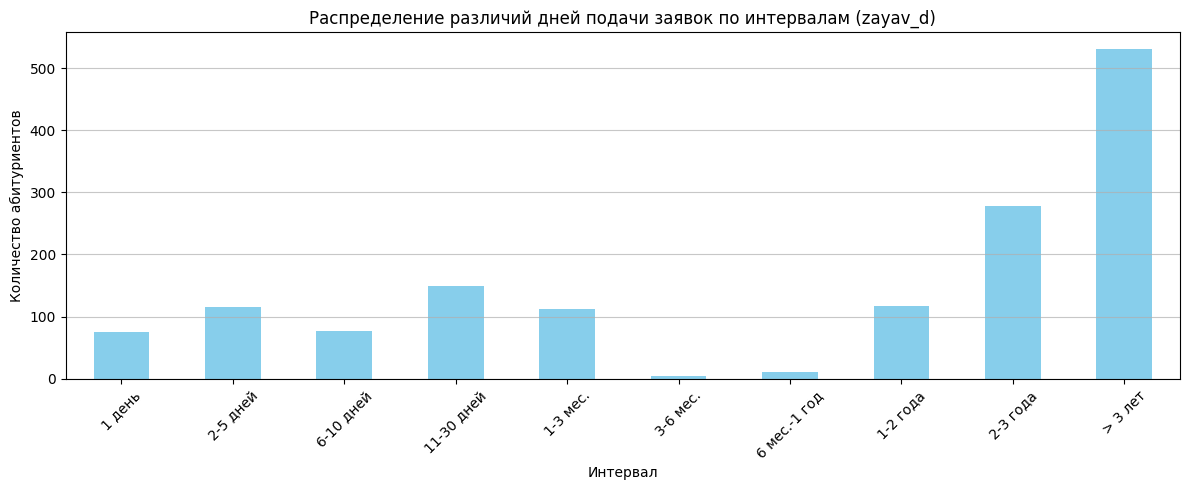

In [31]:
bins = [0, 1, 5, 10, 30, 90, 180, 365, 730, 1095, np.inf]
labels = ['1 день', '2-5 дней', '6-10 дней', '11-30 дней', '1-3 мес.', '3-6 мес.', '6 мес.-1 год', '1-2 года', '2-3 года', '> 3 лет']

dates_var1 = dates_var[dates_var['zayav_diff_days'] > 0].copy()
dates_var1['zayav_diff_bins'] = pd.cut(
    dates_var1['zayav_diff_days'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

plt.figure(figsize=(12, 5))
dates_var1['zayav_diff_bins'].value_counts().reindex(labels).plot(kind='bar', color='skyblue')

plt.title('Распределение различий дней подачи заявок по интервалам (zayav_d)')
plt.xlabel('Интервал')
plt.ylabel('Количество абитуриентов')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()

plt.show()

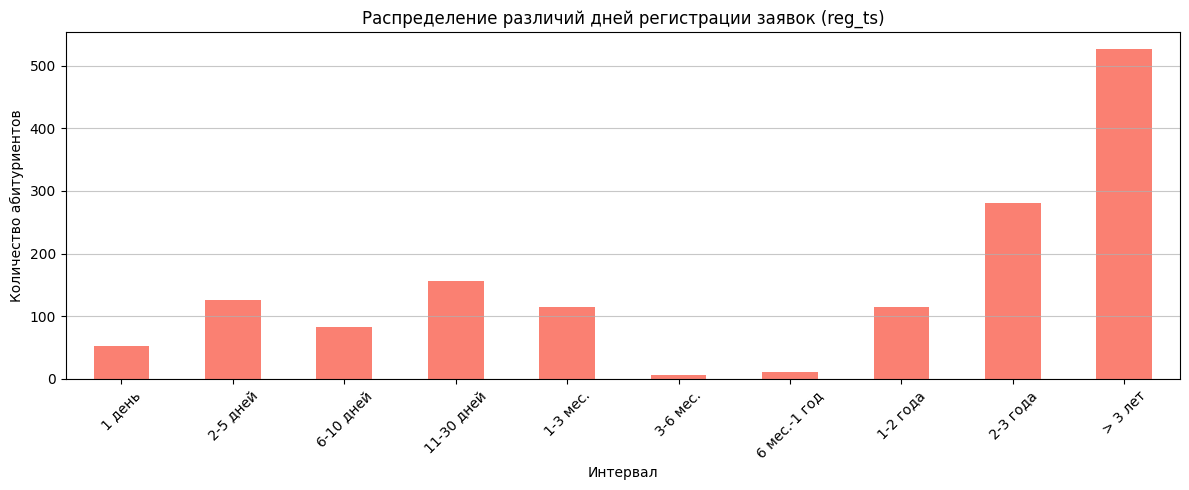

In [32]:
dates_var2 = dates_var[dates_var['reg_diff_days'] > 0].copy()
dates_var2['reg_diff_bins'] = pd.cut(
    dates_var2['reg_diff_days'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

plt.figure(figsize=(12, 5))
dates_var2['reg_diff_bins'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Распределение различий дней регистрации заявок (reg_ts)')
plt.xlabel('Интервал')
plt.ylabel('Количество абитуриентов')
plt.grid(axis='y', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
docs_var = docs.groupby('abitur_kod').agg({
    'ts_abitur': ['min', 'max'],
    'ts_reg': ['min', 'max']
})

docs_var.columns = ['ts_abitur_min', 'ts_abitur_max', 'ts_reg_min', 'ts_reg_max']
docs_var.reset_index(inplace=True)

docs_var['ts_abitur_diff_days'] = (docs_var['ts_abitur_max'] - docs_var['ts_abitur_min']).dt.days
docs_var['ts_reg_diff_days'] = (docs_var['ts_reg_max'] - docs_var['ts_reg_min']).dt.days

docs_var[(docs_var['ts_abitur_diff_days'] > 0) | (docs_var['ts_reg_diff_days'] > 0)]

,abitur_kod,ts_abitur_min,ts_abitur_max,ts_reg_min,ts_reg_max,ts_abitur_diff_days,ts_reg_diff_days


В очищенных данных (таблица "Подача документов") различий в датах подачи заявления и регистрации внутри групп нет

### 4.4. Проверка временных рамок применой комиссии

In [34]:
# Обобщим временные рамки применой комиссии на всё лето
out2023 = docs[((docs['ts_abitur'] < '2023-06-01') | (docs['ts_abitur'] > '2023-08-31')) & (docs['y'] == 2023)]
out2024 = docs[((docs['ts_abitur'] < '2024-06-01') | (docs['ts_abitur'] > '2024-08-31')) & (docs['y'] == 2024)]

print(f"Всего заявок: {len(docs)}")
print(f"Количество заявок вне лета (2023): {len(out2023)}")
print(f"Количество заявок вне лета (2024): {len(out2024)}")

Всего заявок: 82595
Количество заявок вне лета (2023): 125
Количество заявок вне лета (2024): 2


В очищенных данных (таблица "Подача документов") количество заявок вне лета $\approx$ 0.15%.
Ввиду постановки задачи ("Прогнозирование поведения абитуриентов во время приемной кампании") и малочисленности таких данных уберём их из дальнейшего рассмотрения

### 4.5. Сопоставление абитуриентов в logs и docs

In [35]:
logs_recent = logs[logs['y'].isin([2023, 2024])]
# Сравнение количества абитуриентов
print(f"Уникальные абитуриенты (Подача документов): {docs['abitur_kod'].nunique()}")
print(f"Уникальные абитуриенты (Логи): {logs_recent['abitur_kod'].nunique()}")

Уникальные абитуриенты (Подача документов): 18742
Уникальные абитуриенты (Логи): 27343


In [36]:
# Проверка пересечений по абитуриентам
docs_set = set(docs['abitur_kod'].unique())
logs_set = set(logs_recent['abitur_kod'].unique())

intersection = docs_set & logs_set
only_docs = docs_set - logs_set
only_logs = logs_set - docs_set

print(f"Абитуриентов в обоих датасетах: {len(intersection)}")
print(f"Абитуриентов только в docs: {len(only_docs)}")
print(f"Абитуриентов только в logs: {len(only_logs)}")

Абитуриентов в обоих датасетах: 18735
Абитуриентов только в docs: 7
Абитуриентов только в logs: 8608


В основном о всех абитуриентах, которые есть в итоговой таблице подачи документов, фигурируют и в логах (кроме 7 абитуриентов за 2023 год)

## 5. Заполнение пропусков

In [37]:
# В большинстве случаев дата регистрации совпадает с датой подачи заявления
logs['zayav_d'] = logs['zayav_d'].fillna(logs['reg_ts'])

## 6. Отбор наблюдений и признаков

### 6.1. Задача 1. Прогнозирование подачи документов

In [38]:
# Ограничение временного интервала приемной комиссии
start_date = pd.to_datetime('06-01', format='%m-%d').dayofyear
end_date = pd.to_datetime('08-31', format='%m-%d').dayofyear

docs_cleaned = docs[
    (docs['ts_abitur'].dt.dayofyear.between(start_date, end_date)) &
    (docs['ts_reg'].dt.dayofyear.between(start_date, end_date))
].copy()

logs_cleaned = logs[
    (logs['zayav_d'].dt.dayofyear.between(start_date, end_date)) &
    (logs['reg_ts'].dt.dayofyear.between(start_date, end_date))
].copy()

# Фильтрация логов
logs_cleaned = logs_cleaned[
    (logs_cleaned['_oper_type'] != 'delete') & # без операций удаления
    (logs_cleaned['filial_kod'] == 1) & # только главный филиал
    (logs_cleaned['reg_nom'] >= 0) &
    (logs_cleaned['zayav_type_kod'] == 1) & # бакалавриат и специалитет
    (logs_cleaned['priem_type_kod'] == 1) # приемная кампания 1 курс
]

# Исключение записей с регистрацией раньше подачи
logs_cleaned['delta_zayav_reg'] = (logs_cleaned['reg_ts'] - logs_cleaned['zayav_d']).dt.total_seconds()
logs_cleaned = logs_cleaned[logs_cleaned['delta_zayav_reg'] >= 0]

In [39]:
docs_cleaned['date'] = docs_cleaned['ts_abitur'].dt.date
docs_cleaned['hour'] = docs_cleaned['ts_abitur'].dt.hour

docs_by_abiturs = docs_cleaned.groupby(['abitur_kod', 'date', 'hour']).size().reset_index(name='num_directions')
df1_docs = docs_by_abiturs.groupby(['date', 'hour']).size().reset_index(name='y')
df1_docs

,date,hour,y
0,2023-06-01,11,3
1,2023-06-01,13,1
2,2023-06-02,10,1
3,2023-06-02,15,2
4,2023-06-02,16,1
...,...,...,...
1903,2024-08-20,9,1
1904,2024-08-20,10,1
1905,2024-08-20,12,1
1906,2024-08-20,14,1


In [40]:
# Сохранение чистовых данных
df1_docs['datetime'] = pd.to_datetime(df1_docs['date'].astype(str) + ' ' + df1_docs['hour'].astype(str) + ':00:00')
df1_docs = df1_docs.set_index('datetime').sort_index()
y_docs = df1_docs.resample('D')['y'].sum().fillna(0)

y_docs = y_docs[(y_docs.index.month == 6) & (y_docs.index.day >= 20) |
                (y_docs.index.month == 7) & (y_docs.index.day <= 25)]
y_docs.to_excel(DATA_DIR / 'data1_docs_daily.xlsx')

In [41]:
# Сохранение подневных логовых данных
first_mention = logs_cleaned.sort_values(by='zayav_d').drop_duplicates(subset=['abitur_kod'], keep='first')
first_mention['delta_zayav_reg'] = (first_mention['reg_ts'] - first_mention['zayav_d']).dt.total_seconds() / 86400

df1_logs = first_mention.groupby(['zayav_d']).size().reset_index(name='y')
df1_logs.columns = ['date', 'y']
df1_logs = df1_logs.set_index('date').sort_index()
y_logs = df1_logs.resample('D')['y'].sum().fillna(0)

y_logs = y_logs[(y_logs.index.month == 6) & (y_logs.index.day >= 20) |
                (y_logs.index.month == 7) & (y_logs.index.day <= 25)]
y_logs.to_excel(DATA_DIR / 'data1_logs_daily.xlsx')

In [42]:
first_mention = first_mention[first_mention['delta_zayav_reg'] < 5] # оставим только тех, чьи заявки обрабатывались менее 5 суток
first_mention['zayav_d'] = pd.to_datetime(
    first_mention['zayav_d'].dt.date.astype(str) + ' ' + first_mention['reg_ts'].dt.time.astype(str),
    errors='coerce'
)

df1_logs = first_mention.groupby(['zayav_d']).size().reset_index(name='y')
df1_logs.columns = ['date', 'y']
df1_logs = df1_logs.set_index('date').sort_index()
y_logs = df1_logs.resample('H')['y'].sum().fillna(0)

y_logs = y_logs[(y_logs.index.month == 6) & (y_logs.index.day >= 20) |
                (y_logs.index.month == 7) & (y_logs.index.day <= 25)]
y_logs.to_excel(DATA_DIR / 'data1_logs_hourly.xlsx')

## 7. Дополнительный анализ

### 7.1. Анализ длительности обработки заявок

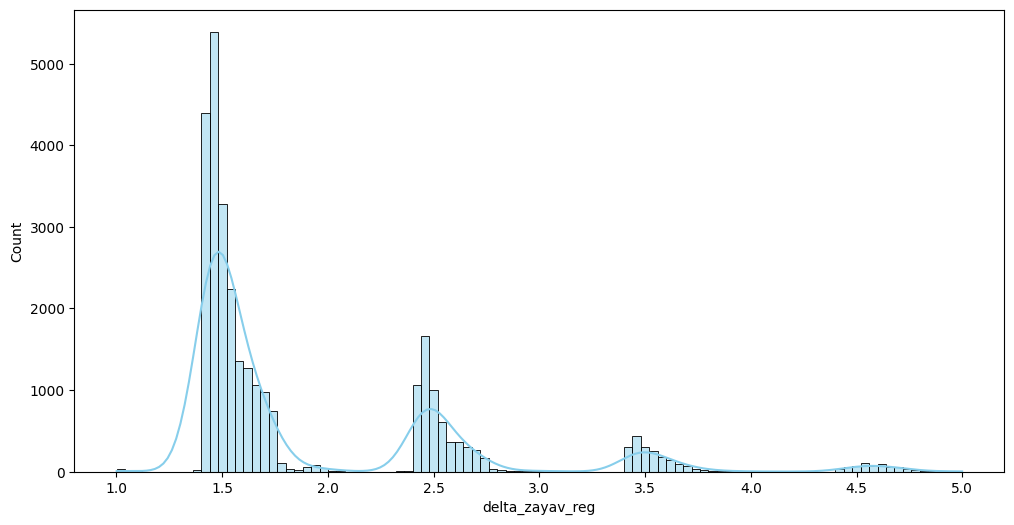

In [43]:
plt.figure(figsize=(12, 6))
sns.histplot(first_mention[first_mention['delta_zayav_reg'] > 1]['delta_zayav_reg'], bins=100, kde=True, color='skyblue')
plt.show()

У более чем 30% абитуриентов регистрация заявки занимало более суток

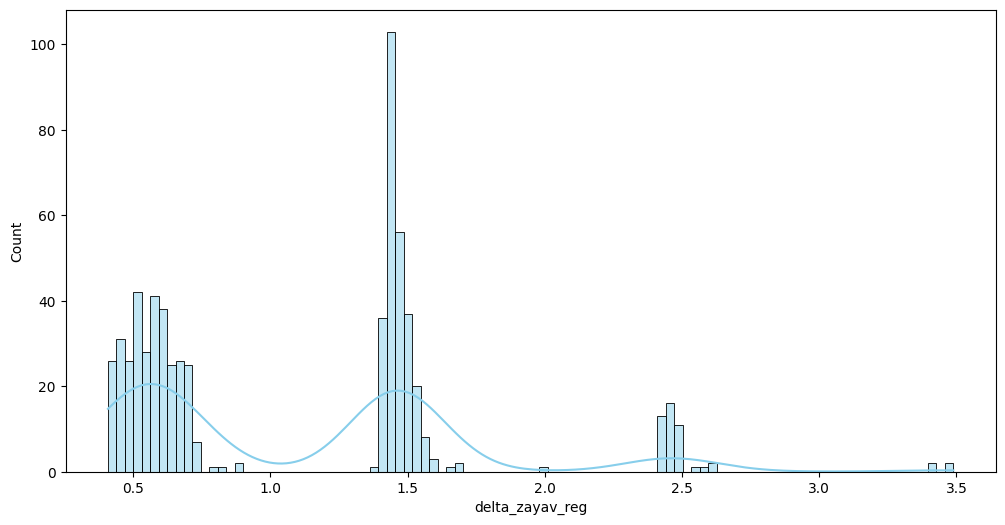

In [44]:
abitur_docs = docs_cleaned[
        (docs_cleaned['y'] == 2024) &
        (docs_cleaned['ts_abitur'] >= '2024-06-20') &
        (docs_cleaned['ts_abitur'] <= '2024-07-25')]['abitur_kod'].unique()

abitur_logs = first_mention[
        (first_mention['y'] == 2024) &
        (first_mention['zayav_d'] >= '2024-06-20') &
        (first_mention['zayav_d'] <= '2024-07-25')]['abitur_kod'].unique()

strange_abiturs = first_mention[first_mention['abitur_kod'].isin(list(set(abitur_logs) - set(abitur_docs)))]

plt.figure(figsize=(12, 6))
sns.histplot(strange_abiturs['delta_zayav_reg'], bins=100, kde=True, color='skyblue')
plt.show()

### 7.2. Анализ продуктивности персонала

In [45]:
first_mention_2023 = first_mention[first_mention['y'] == 2023].copy()
first_mention_2023['reg_ts_hour'] = first_mention_2023['reg_ts'].dt.floor('H')
first_mention_2023['reg_ts_day'] = first_mention_2023['reg_ts'].dt.floor('D')

# Агрегация по часам
hourly_prod = (
    first_mention_2023.groupby(['pk_user_kod', 'reg_ts_hour'])
                      .size()
                      .reset_index(name='apps_count')
)

hourly_summary = (
    hourly_prod.groupby('pk_user_kod')['apps_count']
               .agg(['mean', 'sum', 'count'])
               .reset_index()
)
hourly_summary.rename(columns={'mean': 'avg_per_hour',
                               'sum': 'total_apps',
                               'count': 'hours_reported'}, inplace=True)

print("Сводные статистики по часовому интервалу для 2023 года:")
hourly_summary.sort_values(by='avg_per_hour', ascending=False).head(5)

Сводные статистики по часовому интервалу для 2023 года:


,pk_user_kod,avg_per_hour,total_apps,hours_reported
27,579.0,7.869863,1149,146
24,576.0,6.812785,1492,219
21,573.0,6.417178,1046,163
23,575.0,6.404908,1044,163
7,521.0,6.400000,32,5


In [46]:
# Агрегация по дням
daily_prod = (
    first_mention_2023.groupby(['pk_user_kod', 'reg_ts_day'])
                      .size()
                      .reset_index(name='apps_count')
)

daily_summary = (
    daily_prod.groupby('pk_user_kod')['apps_count']
              .agg(['mean', 'sum', 'count'])
              .reset_index()
)
daily_summary.rename(columns={'mean': 'avg_per_day',
                              'sum': 'total_apps',
                              'count': 'days_reported'}, inplace=True)

print("Сводные статистики по дневному интервалу для 2023 года:")
daily_summary.sort_values(by='avg_per_day', ascending=False).head(5)

Сводные статистики по дневному интервалу для 2023 года:


,pk_user_kod,avg_per_day,total_apps,days_reported
24,576.0,43.882353,1492,34
11,541.0,39.666667,1190,30
27,579.0,34.818182,1149,33
30,582.0,33.000000,594,18
23,575.0,31.636364,1044,33


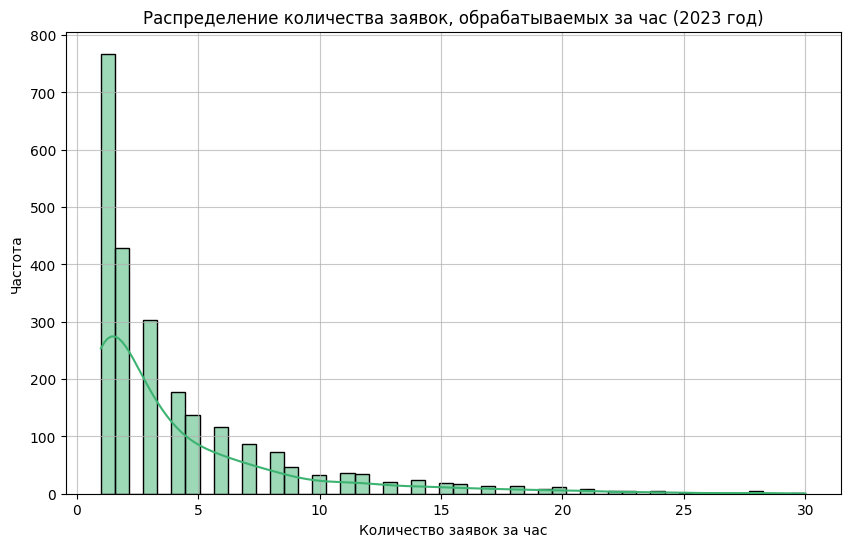

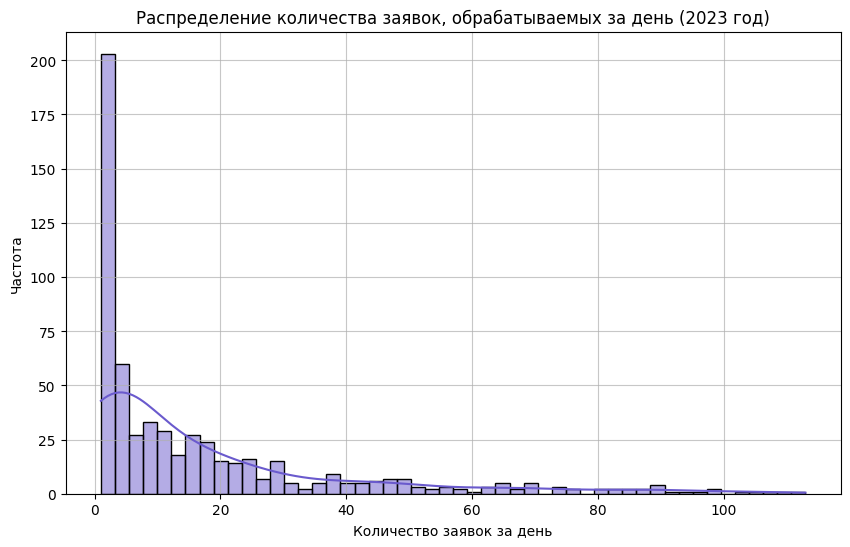

In [47]:
# Гистограмма по часам
plt.figure(figsize=(10, 6))
sns.histplot(hourly_prod['apps_count'], bins=50, kde=True, color='mediumseagreen')
plt.title("Распределение количества заявок, обрабатываемых за час (2023 год)")
plt.xlabel("Количество заявок за час")
plt.ylabel("Частота")
plt.grid(True, alpha=0.7)
plt.show()

# Гистограмма по дням
plt.figure(figsize=(10, 6))
sns.histplot(daily_prod['apps_count'], bins=50, kde=True, color='slateblue')
plt.title("Распределение количества заявок, обрабатываемых за день (2023 год)")
plt.xlabel("Количество заявок за день")
plt.ylabel("Частота")
plt.grid(True, alpha=0.7)
plt.show()